#### Эпизод 1

##### Решение

In [10]:
import matplotlib.pyplot as plt

def episode_1(sol: int, borders: int = 10, width: int = 10, pointsize: int = 20):
    if sol not in range(1, 6):
        raise Exception
    with open("dead_moroz/" + str(sol).rjust(3, "0") + ".dat") as f:
        counter = 0
        stopper = None
        xbox = [1e10, -1e10]
        ybox = [1e10, -1e10]
        points = []
        for line in f:
            if counter == 0:
                stopper = int(line.replace("\n", ""))
            else:
                x, y = [float(i) for i in line.replace("\n", "").split()]
                xbox[0] = min(x - borders, xbox[0])
                xbox[1] = max(x + borders, xbox[1])
                ybox[0] = min(y - borders, ybox[0])
                ybox[1] = max(y + borders, ybox[1])
                # plt.scatter(x, y, c="navy")
                points.append([x, y])
            if counter == stopper:
                break
            counter += 1
            
        w, h = xbox[1] - xbox[0], ybox[1] - ybox[0]
        m = max(w, h)
            
        fig, ax = plt.subplots(figsize=(w*width/m, h*width/m))
        for i in range(stopper):
            ax.scatter(points[i][0], points[i][1], c="navy", s=pointsize)
        ax.axis("equal")
        ax.set_xlim(xbox)
        ax.set_ylim(ybox)
        ax.set_title(f"Number of points: {stopper}")
        plt.show()

##### Отображение

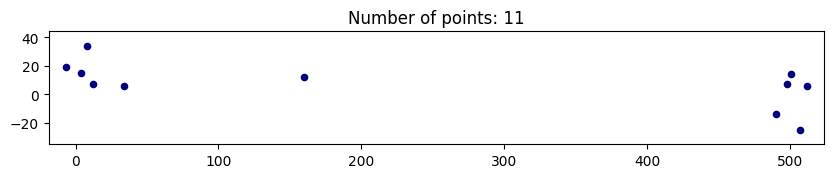

In [11]:
episode_1(1)

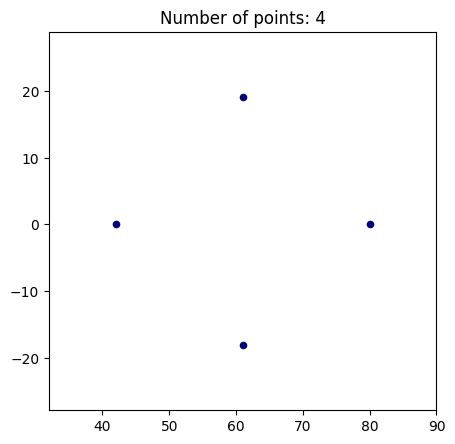

In [12]:
episode_1(2, width=5)

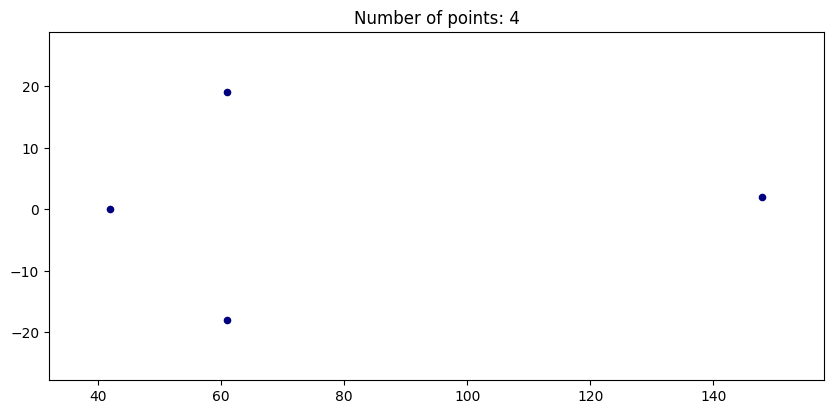

In [4]:
episode_1(3)

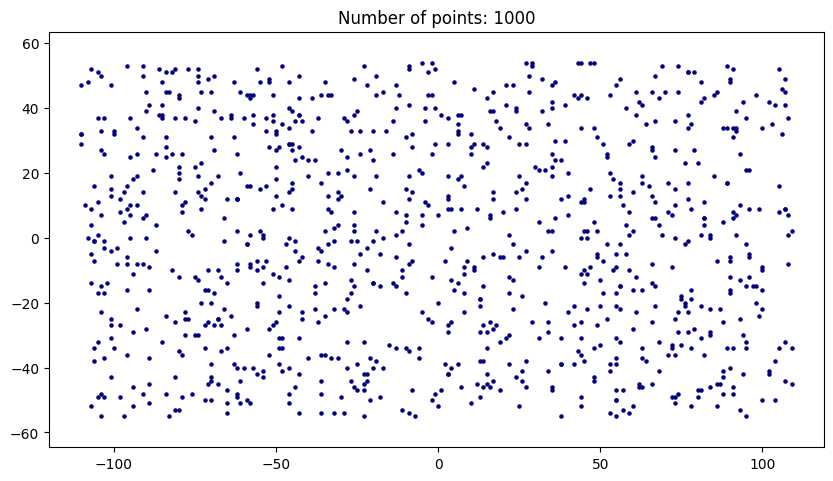

In [5]:
episode_1(4, pointsize=5)

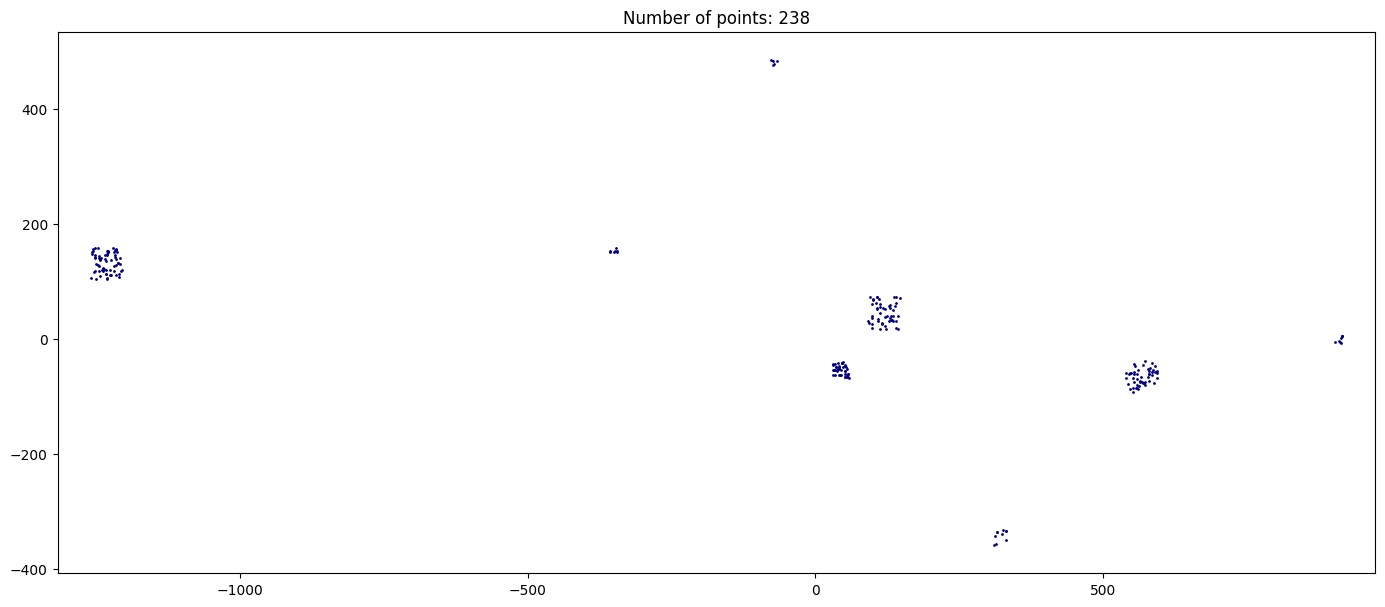

In [8]:
episode_1(5, pointsize=1, borders=50, width=17)

#### Эпизод 2

##### Решение

In [7]:
import matplotlib.pyplot as plt

def episode_2(borders: int = 3, width: int = 15, heigth: int = 12, save_figs: bool = False):
    from numpy import arange, floor
    with open("frames.dat") as f:
        frames = []
        for line in f:
            frames.append([float(i) for i in line.replace("\n", "").split()])
    N = int(len(frames) // 2)
    xbox = [1e10, -1e10]
    ybox = [1e10, -1e10]
    for i in range(N):
        xbox[0] = min(min(frames[2*i+0]), xbox[0])
        xbox[1] = max(max(frames[2*i+0]), xbox[1])
        ybox[0] = min(min(frames[2*i+1]) - borders, ybox[0])
        ybox[1] = max(max(frames[2*i+1]) + borders, ybox[1])
    
    w, h = xbox[1] - xbox[0], ybox[1] - ybox[0]
    
    if not save_figs:
        fig, axs = plt.subplots(int(N//2), 2, figsize=(width, heigth))
    else:
        fig, axs = plt.subplots(figsize=(16, 9))
        
    for i in range(N):
        ax = axs if save_figs else axs[i // 2][i % 2]
        x, y = frames[2*i+0], frames[2*i+1]
        ax.plot(x, y, c="navy")
        ax.grid()
        ax.set_xlim(xbox)
        ax.set_ylim(ybox)
        ax.set_title(f"Frame {i}")
        ax.set_xticks(arange(floor(xbox[0]), floor(xbox[1]+1), 1.0))
        ax.set_yticks(arange(floor(ybox[0]), floor(ybox[1]+1), 2.0))
            
        if save_figs:
            plt.savefig("laba01-ep02/" + str(i).rjust(4, "0") + ".jpg")
            axs.clear()
    if not save_figs:
        plt.show()

##### Отображение

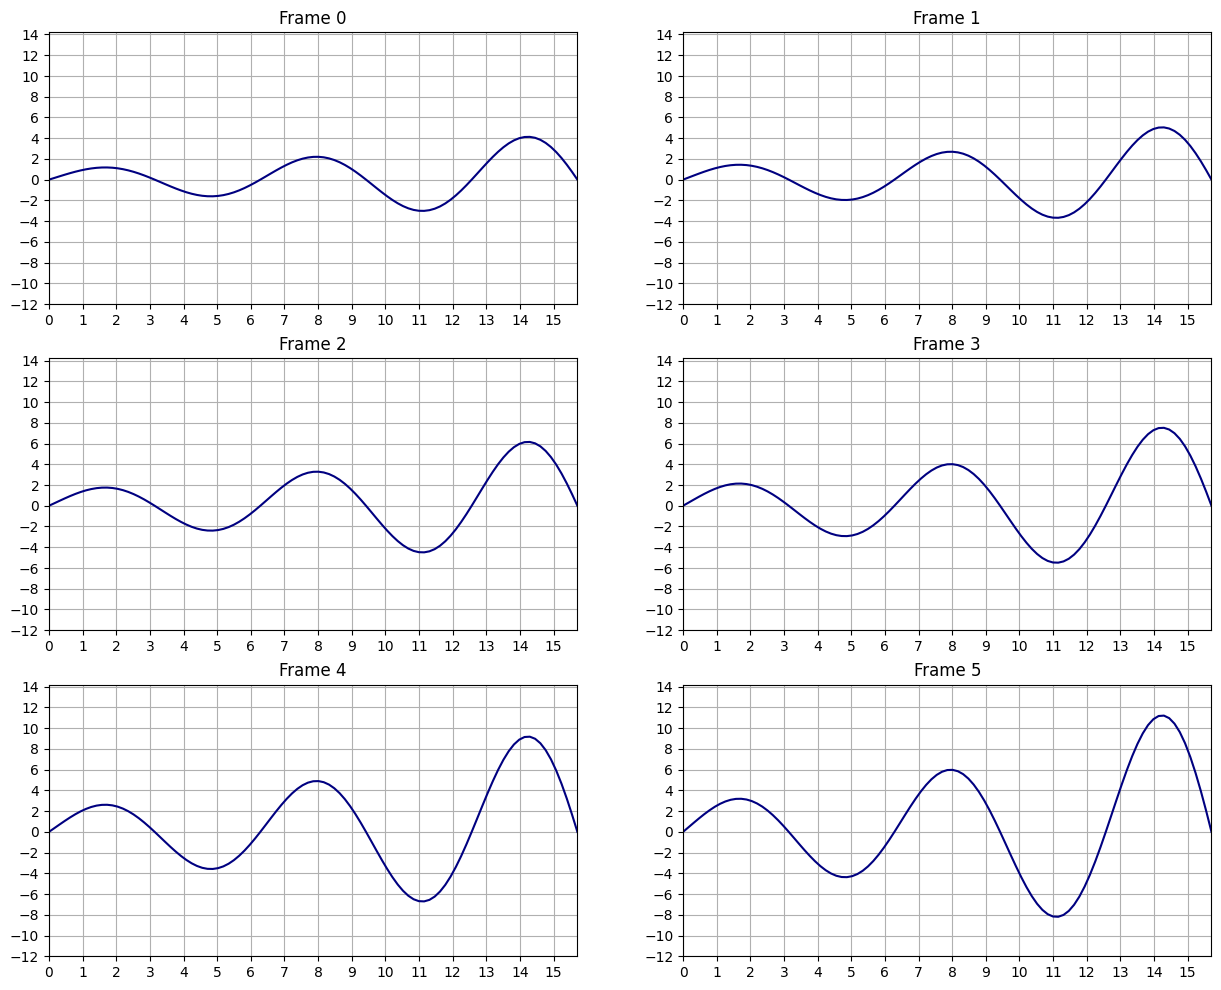

In [8]:
episode_2(save_figs=False)

![](gif/res.gif)

#### Эпизод 3

##### Решение

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def episode_3(width: int = 15):
    data = []
    preps = set()
    groups = set()
    with open("students.csv") as f:
        for lines in f:
            row = lines.replace("\n", "").split(";")
            data.append(row[0:2] + [int(row[2])])
            preps.add(row[0])
            groups.add(row[1])
    
    preps = sorted(preps)
    marks = {i: [0 for _ in range(len(preps))] for i in range(3, 11)}
    for row in data:
        marks[row[2]][preps.index(row[0])] += 1
    
    fig, ax = plt.subplots(figsize=(width, width/2))
    bottom = np.zeros(len(preps))
    for i in sorted(marks.keys(), reverse=False):
        t = i / 11
        color1 = [0, 255, 255]
        color2 = [88, 3, 167]
        color = list(np.array(color1)/256*t + np.array(color2)/256*(1 - t))
        plt.bar([f"Преподаватель {j}" for j in range(1,8)], marks[i], color=color, label=i, bottom=bottom)
        bottom += np.array(marks[i])
    plt.legend()
    plt.show()

##### Отображение

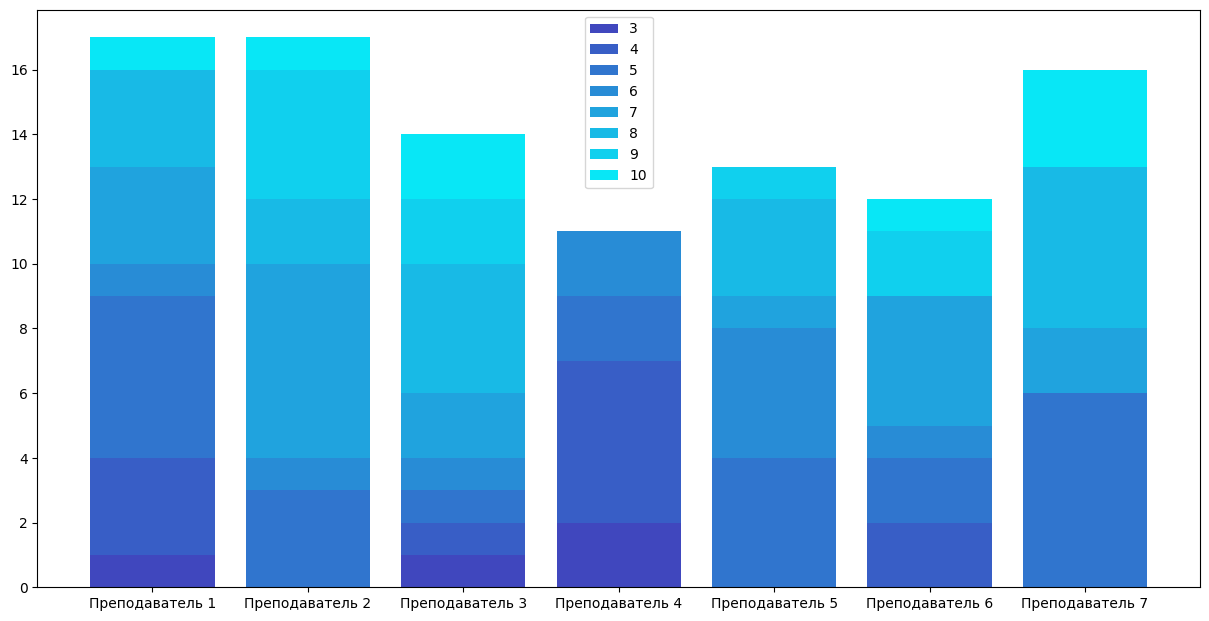

In [10]:
episode_3()

In [ ]:
d = {1: '1', 2: '2'}
d.get()